In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df_flat = pd.read_csv("./training_data_flat.csv")

In [37]:
sample = df_flat[(df_flat["ESN"] == 101) & ((df_flat["Cumulative_HPC_SVs"] == 2 ) | (df_flat["Cumulative_HPC_SVs"] == 1))]
sample

,ESN,Cycles_Since_New,Cumulative_WWs,Cumulative_HPC_SVs,Cumulative_HPT_SVs,Cycles_to_WW,Cycles_to_HPC_SV,Cycles_to_HPT_SV,Sensed_Altitude_1,Sensed_Altitude_2,...,Sensed_P25_7,Sensed_P25_8,Sensed_T5_1,Sensed_T5_2,Sensed_T5_3,Sensed_T5_4,Sensed_T5_5,Sensed_T5_6,Sensed_T5_7,Sensed_T5_8
852,101,8520,8,1,2,320,7400,2930,189.321516,258.321516,...,22.649837,22.224233,1413.459127,1412.840501,1396.548153,1287.919789,NaN,1222.842895,1241.752690,1235.300707
853,101,8530,8,1,2,310,7390,2920,255.321516,296.321516,...,21.714153,19.972743,1475.807243,1471.670178,1431.718014,1309.599033,NaN,1268.327697,1258.742556,1225.326137
854,101,8540,8,1,2,300,7380,2910,747.321516,788.321516,...,19.771525,19.922104,1433.047166,1429.270055,1383.193341,1267.828196,1218.302333,1218.401442,1210.511417,1207.608973
855,101,8550,8,1,2,290,7370,2900,332.321516,386.321516,...,20.132380,19.760779,1435.274381,1428.927724,1387.479047,1291.796410,NaN,1243.500660,1220.458590,1213.639347
856,101,8560,8,1,2,280,7360,2890,1207.321516,1270.321516,...,18.690089,18.553685,1390.929645,1393.348029,1383.297207,1285.461301,1197.406084,1195.713344,1180.799082,1175.946763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,101,19960,20,2,5,40,40,40,-43.678484,15.321516,...,15.988739,15.541883,1492.000320,1488.882411,1469.792199,1362.649220,1268.576685,1232.410743,1238.506493,1227.302642
1997,101,19970,20,2,5,30,30,30,765.321516,824.321516,...,22.303743,22.065948,1448.941772,1445.874252,1430.850885,1342.302920,NaN,1303.571196,1300.313700,1297.124502
1998,101,19980,20,2,5,20,20,20,70.321516,98.321516,...,19.212272,18.182983,1374.332798,1377.572018,1360.171334,1321.974567,1225.494390,1223.721128,1205.852075,1180.509853
1999,101,19990,20,2,5,10,10,10,181.321516,246.321516,...,17.878255,17.069030,1306.169180,1304.935621,1282.366617,1241.161134,1166.485328,1172.072433,1173.762274,1151.215345


In [47]:
sample.filter(regex="Sensed_T\\d+?_4")

,Sensed_T25_4,Sensed_T3_4,Sensed_T45_4,Sensed_T5_4
852,713.812767,1517.412471,2056.579721,1287.919789
853,721.277070,1531.711205,2079.218150,1309.599033
854,700.826635,1494.635198,2027.502617,1267.828196
855,708.524029,1510.230112,2054.724498,1291.796410
856,711.270583,1512.365480,2051.035229,1285.461301
...,...,...,...,...
1996,725.529218,1532.952584,2142.697257,1362.649220
1997,719.824345,1520.587010,2122.226603,1342.302920
1998,706.957459,1498.553731,2092.824601,1321.974567
1999,663.886042,1411.579377,1962.802696,1241.161134


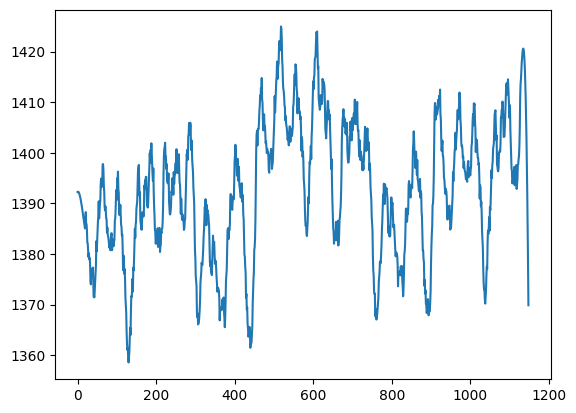

In [48]:
from scipy.signal import savgol_filter
def apply_sg(series, win=40, poly=3):
    # Handle edge case: if cycle is shorter than window, adjust window or return raw
    if len(series) < win:
        return series 
    return savgol_filter(series, window_length=win, polyorder=poly)

plt.plot(apply_sg(sample.filter(regex="Sensed_T\\d+?_4").mean(axis=1)))

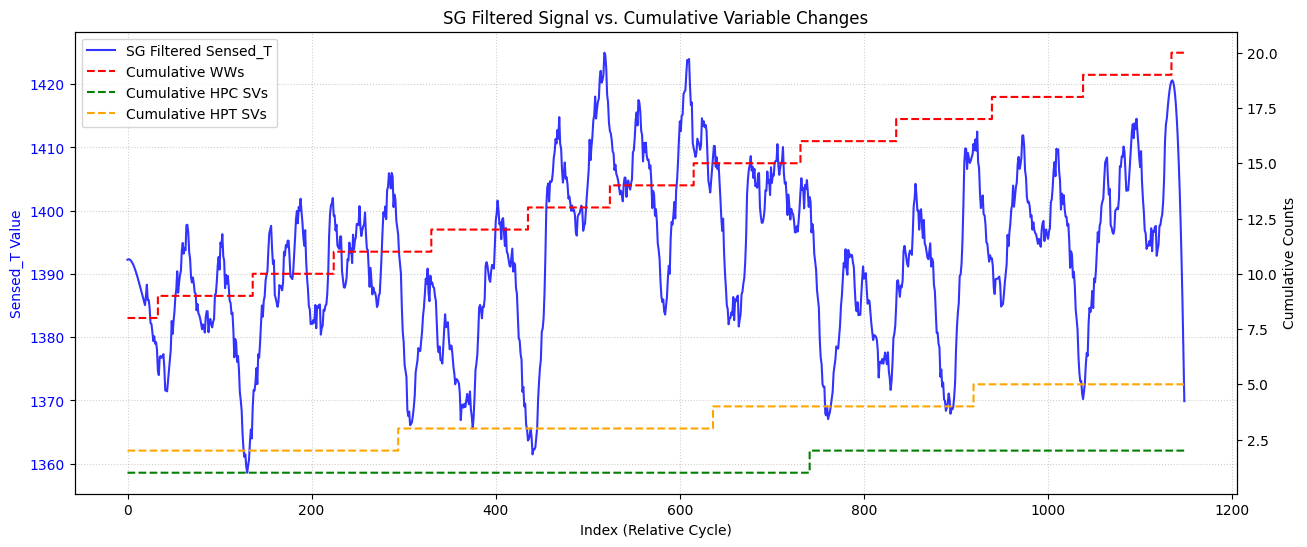

In [49]:
import matplotlib.pyplot as plt

# 1. Compute the signal just like in your previous cell
#    (Assuming 'sample' and 'apply_sg' are defined as in your notebook)
signal_values = apply_sg(sample.filter(regex="Sensed_T\\d+?_4").mean(axis=1))

# 2. Extract the cumulative data as numpy arrays to align with the signal index
cum_ww = sample['Cumulative_WWs'].values
cum_hpc = sample['Cumulative_HPC_SVs'].values
cum_hpt = sample['Cumulative_HPT_SVs'].values

# 3. Create the plot
fig, ax1 = plt.subplots(figsize=(15, 6))

# --- Left Axis: Sensor Signal ---
ax1.plot(signal_values, color='blue', label='SG Filtered Sensed_T', linewidth=1.5, alpha=0.8)
ax1.set_xlabel('Index (Relative Cycle)')
ax1.set_ylabel('Sensed_T Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle=':', alpha=0.6)

# --- Right Axis: Cumulative Counters ---
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

# Plot each cumulative variable as a step function
ax2.step(range(len(cum_ww)), cum_ww, where='post', color='red', linestyle='--', label='Cumulative WWs')
ax2.step(range(len(cum_hpc)), cum_hpc, where='post', color='green', linestyle='--', label='Cumulative HPC SVs')
ax2.step(range(len(cum_hpt)), cum_hpt, where='post', color='orange', linestyle='--', label='Cumulative HPT SVs')

ax2.set_ylabel('Cumulative Counts', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('SG Filtered Signal vs. Cumulative Variable Changes')
plt.show()